# Exploring COBRApy
stuf I want to do:
- turn datasets into models (model reconstruction) 
- run dFBA for simulations + understand (d)FBA mechanics
- do some model optimization (control) related stuff


In [ ]:
# ! pip install cobra 

In [15]:
import cobra
from cobra.io import load_model

# "iJO1366" and "salmonella" are also valid arguments
model = load_model("textbook")
model

Name,e_coli_core
Memory address,7aa888794470
Number of metabolites,72
Number of reactions,95
Number of genes,137
Number of groups,0
Objective expression,1.0*Biomass_Ecoli_core - 1.0*Biomass_Ecoli_core_reverse_2cdba
Compartments,"cytosol, extracellular"


In [3]:
print(len(model.reactions))
print(len(model.metabolites))
print(len(model.genes))

95
72
137


In [21]:
model.genes[40]

Gene identifier,b4152
Name,frdC
Memory address,0x7aa8886cbfe0
Functional,True
In 1 reaction(s),FRD7


# Exploring RAVEN - matlab :'(
maybe translate the code to python with Claude

stuff I want to do:
- replicate the GEMs used Larsson, with their RNA seq dataset

# Making metabolic_task.txt file
- must match the RAven format of metabolic tasks

In [ ]:
import csv

def inspect_csv(file_path):
    """Reads and inspects the structure of a CSV file."""
    with open(file_path, mode='r', newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        data = [row for row in reader]
    
    # Print the number of rows and columns in the CSV file
    print(f"CSV file has {len(data)} rows.")
    if data:
        print(f"CSV file has {len(data[0])} columns (based on the first row).")
    
    # Print the first few rows for inspection
    print("\nFirst few rows of the CSV file:")
    for row in data[:5]:
        print(row)

def inspect_txt(file_path):
    """Reads and inspects the structure of a TXT file."""
    with open(file_path, mode='r', encoding='utf-8') as txtfile:
        lines = txtfile.readlines()
    
    # Print the number of lines in the TXT file
    print(f"TXT file has {len(lines)} lines.")
    
    # Print the first few lines for inspection
    print("\nFirst few lines of the TXT file:")
    for line in lines[:5]:
        print(line.strip())

# Paths to your files
csv_file_path = "/home/andrei/Downloads/metabolicTasks_Agren/Dataset_7/Dataset_7.csv"  # Replace with the actual CSV file path
txt_file_path = "/home/andrei/Downloads/humanMetabolicTasks_Raven_Full.txt"  # Replace with the actual TXT file path

# Inspect the files
print("Inspecting CSV file:")
inspect_csv(csv_file_path)

print("\nInspecting TXT file:")
inspect_txt(txt_file_path)


Inspecting CSV file:
TXT file has 476 lines.

First few lines of the TXT file:
SHOULD
ID                  DESCRIPTION                 FAIL  IN
ER: Energy and
redox; IC: Internal
conversions; SU:

Inspecting TXT file:
TXT file has 476 lines.

First few lines of the TXT file:
ID	DESCRIPTION	SHOULD FAIL	IN	IN LB	IN UB	OUT	OUT LB	OUT UB	EQU	EQU LB	EQU UB	CHANGED RXN	CHANGED LB	CHANGED UB	PRINT FLUX	COMMENTS
1	Aerobic rephosphorylation of ATP from glucose		O2[e];glucose[e]			H2O[e];CO2[e];H+[c]			ATP[c] + H2O[c] => ADP[c] + Pi[c] + H+[c]	1
2	Aerobic rephosphorylation of ATP from a fatty acid		O2[e];palmitate[e]			H2O[e];CO2[e];H+[c]			ATP[c] + H2O[c] => ADP[c] + Pi[c] + H+[c]	1
3	Aerobic rephosphorylation of GTP		O2[e];glucose[e]			H2O[e];CO2[e];H+[c]			GTP[c] + H2O[c] => GDP[c] + Pi[c] + H+[c]	1
4	Aerobic rephosphorylation of CTP		O2[e];glucose[e]			H2O[e];CO2[e];H+[c]			CTP[c] + H2O[c] => CDP[c] + Pi[c] + H+[c]	1


### problem: can't read csv file



In [11]:
file_path = "/home/andrei/Downloads/metabolicTasks_Agren/Dataset_7/Dataset_7.csv" 
import pandas as pd

dummy = pd.read_csv(file_path, encoding = "ISO-8859-1")


with open(file_path, mode='r', newline='', encoding="ISO-8859-1") as csvfile:
    reader = csv.reader(csvfile)
    
    # Loop through the rows and print them
    for row in reader:
        print(row)

['', 'ID', 'DESCRIPTION', 'SHOULD FAIL', 'IN', 'IN LB', 'IN UB', 'OUT', 'OUT LB', 'OUT UB', 'EQU', 'EQU LB', 'EQU UB', 'CHANGED RXN', 'CHANGED LB', 'CHANGED UB', 'PRINT FLUX', 'COMMENTS', 'REFERENCES', 'EXPLANATIONS']
['#', 'ER: Energy and redox; IC: Internal conversions; SU: Substrate utilization; BS: Biosynthesis of products; GR: Growth', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['#', 'Rephosphorylation of nucleoside triphosphates', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'All cellular functions are dependent on a continuous supply of energy, which is derived from the sequential breakdown of organic molecules during the process of cellular respiration. The energy released during this process is ultimately stored in the form of nucleoside triphosphates (primarily ATP). In all cells, ATP forms a pool of readily available energy for all the metabolic functions of the cell [ISSN:9780443068508]. ATP is the chemical energy carrier in a

### **Left here**, run gpt code to put csv in the format of txt;

In [13]:
import csv

def transform_csv_to_txt_format(input_csv_path, output_txt_path):
    """Transforms a CSV file to match the format of the given TXT file."""
    with open(input_csv_path, mode='r', encoding='ISO-8859-1') as csvfile:
        reader = csv.reader(csvfile)
        rows = [row for row in reader]

    # Extract the header row (ignoring metadata rows starting with '#')
    header = [row for row in rows if not row[0].startswith('#') and row[0]][0]

    # Filter out metadata rows, comments, and empty rows
    clean_rows = [
        row for row in rows
        if row[0] not in ['', '#'] and not row[0].startswith('#')
    ]

    # Ensure proper formatting (remove trailing columns and keep relevant data)
    formatted_rows = []
    for row in clean_rows:
        # Trim extra columns to match the TXT header format
        formatted_row = row[:len(header)]
        formatted_rows.append(formatted_row)

    # Write to output file in TXT format (tab-delimited)
    with open(output_txt_path, mode='w', encoding='utf-8') as txtfile:
        # Write the header
        txtfile.write('\t'.join(header) + '\n')
        
        # Write the rows
        for row in formatted_rows:
            txtfile.write('\t'.join(row) + '\n')

# File paths
input_csv_path = '/home/andrei/Downloads/metabolicTasks_Agren/Dataset_7/Dataset_7.csv'  # Replace with your CSV file path
output_txt_path = '/home/andrei/Downloads/metabolicTasks_Agren/Dataset_7/Dataset_7_new.txt'  # Replace with the desired TXT file path

# Transform the file
transform_csv_to_txt_format(input_csv_path, output_txt_path)


IndexError: list index out of range

In [14]:
def first_row_to_list(file_path):
    """Reads the first row of a text file and splits it into words."""
    with open(file_path, mode='r', encoding='utf-8') as file:
        # Read the first line
        first_line = file.readline().strip()
        # Split the line into words (assumes words are separated by spaces or tabs)
        words = first_line.split()
    return words

# Example usage
file_path = '/home/andrei/Downloads/humanMetabolicTasks_Raven_Full.txt'  # Replace with the path to your text file
words_list = first_row_to_list(file_path)
print(words_list)


['ID', 'DESCRIPTION', 'SHOULD', 'FAIL', 'IN', 'IN', 'LB', 'IN', 'UB', 'OUT', 'OUT', 'LB', 'OUT', 'UB', 'EQU', 'EQU', 'LB', 'EQU', 'UB', 'CHANGED', 'RXN', 'CHANGED', 'LB', 'CHANGED', 'UB', 'PRINT', 'FLUX', 'COMMENTS']


In [ ]:
['', 'ID', 'DESCRIPTION', 'SHOULD FAIL', 'IN', 'IN LB', 'IN UB', 'OUT', 'OUT LB', 'OUT UB', 'EQU', 'EQU LB', 'EQU UB', 'CHANGED RXN', 'CHANGED LB', 'CHANGED UB', 'PRINT FLUX', 'COMMENTS', 'REFERENCES', 'EXPLANATIONS']


['ID', 'DESCRIPTION', 'SHOULD', 'FAIL', 'IN', 'IN', 'LB', 'IN', 'UB', 'OUT', 'OUT', 'LB', 'OUT', 'UB', 'EQU', 'EQU', 'LB', 'EQU', 'UB', 'CHANGED', 'RXN', 'CHANGED', 'LB', 'CHANGED', 'UB', 'PRINT', 'FLUX', 'COMMENTS']

# all values on all rows the same in csv as in txt, except for last 2 => discard them



In [47]:
import pandas as pd

# Replace 'your_file.txt' with the path to your text file
file_path = "/home/andrei/Downloads/humanMetabolicTasks_Raven_Full.txt"

# Load the text file into a DataFrame
df = pd.read_csv(file_path, delimiter='\t+')  # Use delimiter=',' for CSV-like files

# Display the DataFrame
print(len(df["DESCRIPTION"]))


475


/tmp/ipykernel_9982/3535046593.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, delimiter='\t+')  # Use delimiter=',' for CSV-like files


In [27]:
file_path = "/home/andrei/Downloads/humanMetabolicTasks_Raven_Full.txt"  # Replace with the actual file path

with open(file_path, mode='r', encoding='utf-8') as txtfile:
    lines = txtfile.readlines()

# Print the number of lines in the TXT file
print(f"TXT file has {len(lines)} lines.")

# Print the first few lines for inspection
print("\nFirst few lines of the TXT file:")
for line in lines[:5]:  # Display only the first 5 lines for a quick check
    print(line.strip())

# Parse the lines into a matrix where the first line contains column names
# Remove leading/trailing whitespaces and split by tab or other delimiters
columns = lines[0].strip().split('\t')  # Assuming columns are tab-separated

# Create the matrix by splitting the remaining lines into rows
matrix = [line.strip().split('\t') for line in lines[1:]]  # Skip the first line (header)

# Print the resulting matrix (list of lists)
print("\nMatrix representation (first few rows):")
for row in matrix[:5]:  # Print the first 5 rows
    print(row)

# Optionally: If you want to convert it into a Pandas DataFrame:
import pandas as pd
df = pd.DataFrame(matrix, columns=columns)

# Display the DataFrame
print("\nDataFrame:")
print(df)



TXT file has 476 lines.

First few lines of the TXT file:
ID	DESCRIPTION	SHOULD FAIL	IN	IN LB	IN UB	OUT	OUT LB	OUT UB	EQU	EQU LB	EQU UB	CHANGED RXN	CHANGED LB	CHANGED UB	PRINT FLUX	COMMENTS
1	Aerobic rephosphorylation of ATP from glucose		O2[e];glucose[e]			H2O[e];CO2[e];H+[c]			ATP[c] + H2O[c] => ADP[c] + Pi[c] + H+[c]	1
2	Aerobic rephosphorylation of ATP from a fatty acid		O2[e];palmitate[e]			H2O[e];CO2[e];H+[c]			ATP[c] + H2O[c] => ADP[c] + Pi[c] + H+[c]	1
3	Aerobic rephosphorylation of GTP		O2[e];glucose[e]			H2O[e];CO2[e];H+[c]			GTP[c] + H2O[c] => GDP[c] + Pi[c] + H+[c]	1
4	Aerobic rephosphorylation of CTP		O2[e];glucose[e]			H2O[e];CO2[e];H+[c]			CTP[c] + H2O[c] => CDP[c] + Pi[c] + H+[c]	1

Matrix representation (first few rows):
['1', 'Aerobic rephosphorylation of ATP from glucose', '', 'O2[e];glucose[e]', '', '', 'H2O[e];CO2[e];H+[c]', '', '', 'ATP[c] + H2O[c] => ADP[c] + Pi[c] + H+[c]', '1']
['2', 'Aerobic rephosphorylation of ATP from a fatty acid', '', 'O2[e];palmitate[e]'

# BNCI interlude

In [1]:
import pandas as pd

# Assuming you have a DataFrame called df
# Replace 'Diagnosis' with the name of your binary variable column
file_path = '/home/andrei/Downloads/alzheimers_disease_data.csv'

# Load the dataset
df = pd.read_csv(file_path)

diagnosis_counts = df['Diagnosis'].value_counts()

# To see how many rows are 1 and 0
print("Count of 1s:", diagnosis_counts.get(1, 0))
print("Count of 0s:", diagnosis_counts.get(0, 0))


Count of 1s: 760
Count of 0s: 1389


In [2]:
760/1389

0.5471562275017998

### Covariate adjustment

In [ ]:

data = df

memory_complaints_probs = data['MemoryComplaints'].value_counts(normalize=True)

# Initialize probabilities
p_y_given_do_x1 = 0
p_y_given_do_x0 = 0

# Compute probabilities for X = 1 and X = 0
for z_value, p_z in memory_complaints_probs.items():
    # Filter data for the current level of Z
    data_z = data[data['MemoryComplaints'] == z_value]
    
    # P(Y=1 | X=1, Z=z)
    p_y_given_x1_z = data_z[data_z['HeadInjury'] == 1]['Diagnosis'].mean()
    
    # P(Y=1 | X=0, Z=z)
    p_y_given_x0_z = data_z[data_z['HeadInjury'] == 0]['Diagnosis'].mean()
    
    # Weight by P(Z)
    p_y_given_do_x1 += p_y_given_x1_z * p_z
    p_y_given_do_x0 += p_y_given_x0_z * p_z

# Compute Risk Difference
risk_difference = p_y_given_do_x1 - p_y_given_do_x0

# Output results
print(f"P(Y=1 | do(X=1)) = {p_y_given_do_x1:.4f}")
print(f"P(Y=1 | do(X=0)) = {p_y_given_do_x0:.4f}")
print(f"Risk Difference = {risk_difference:.4f}")


P(Y=1 | do(X=1)) = 0.3312
P(Y=1 | do(X=0)) = 0.3559
Risk Difference = -0.0247


### logistic regr for odds ration

In [3]:
! pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 6.7 MB/s eta 0:00:0000:010:01


In [4]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import logit

# Example frequency dataset
# Replace with your actual dataset

file_path = '/home/andrei/Downloads/alzheimers_disease_data.csv'

# Load the dataset
df = pd.read_csv(file_path)


# Logistic Regression Model
# Adjust for the confounder MemoryComplaints
model = logit("Diagnosis ~ HeadInjury + MemoryComplaints", data=df)
result = model.fit()

# Display Results
print(result.summary())

# Extract Odds Ratios
odds_ratios = pd.DataFrame({
    "Variable": result.params.index,
    "Odds Ratio": result.params.apply(lambda x: sm.stats.api.exp(x)),
    "95% CI Lower": result.conf_int()[0].apply(lambda x: sm.stats.api.exp(x)),
    "95% CI Upper": result.conf_int()[1].apply(lambda x: sm.stats.api.exp(x))
})
print("\nOdds Ratios:")
print(odds_ratios)


Optimization terminated successfully.
         Current function value: 0.604298
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2146
Method:                           MLE   Df Model:                            2
Date:                Thu, 19 Dec 2024   Pseudo R-squ.:                 0.06985
Time:                        19:18:05   Log-Likelihood:                -1298.6
converged:                       True   LL-Null:                       -1396.2
Covariance Type:            nonrobust   LLR p-value:                 4.433e-43
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.9407      0.056    -16.749      0.000      -1.051      -0.831
HeadInjury 

AttributeError: module 'statsmodels.stats.api' has no attribute 'api'

In [2]:
import os
from openpyxl import load_workbook

def search_string_in_xlsx(folder_path, search_string):
    """
    Searches through all .xlsx files in a folder for a particular string
    and returns the names of the files containing that string.
    
    Args:
        folder_path (str): Path to the folder containing .xlsx files.
        search_string (str): The string to search for.

    Returns:
        list: A list of file names containing the search string.
    """
    matching_files = []

    # Iterate over all files in the folder
    for file_name in os.listdir(folder_path):
        # Check if the file is an .xlsx file
        if file_name.endswith('.xlsx'):
            file_path = os.path.join(folder_path, file_name)

            try:
                # Load the workbook
                workbook = load_workbook(file_path)
                # Iterate through all sheets in the workbook
                for sheet in workbook.sheetnames:
                    sheet_data = workbook[sheet]
                    # Iterate through all cells in the sheet
                    for row in sheet_data.iter_rows():
                        for cell in row:
                            # Check if the cell contains the search string
                            if cell.value and search_string in str(cell.value):
                                matching_files.append(file_name)
                                raise StopIteration  # Exit early if match is found
            except StopIteration:
                pass
            except Exception as e:
                print(f"Error reading {file_name}: {e}")
    
    return matching_files


# Usage example
if __name__ == "__main__":
    folder_path = "/home/andrei/Downloads/supplementary-tables/Supplementary-Tables"
    search_string = "HCC"
    
    results = search_string_in_xlsx(folder_path, search_string)
    if results:
        print("Files containing the string:")
        for file in results:
            print(file)
    else:
        print("No files found containing the string.")


Files containing the string:
Table S6.xlsx
Table S2.xlsx
Table S17.xlsx
Table S8.xlsx
Table S20.xlsx


In [8]:
import re

def extract_ids_above_species_e(file_path):
    # Open and read the XML file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    result = []
    id_above = None

    # Iterate through the lines of the file
    for line in lines:
        # Check for an id=<string>
        id_match = re.search(r'id="([^"]+)"', line)
        if id_match:
            # Store the current id
            id_above = id_match.group(1)

        # Check for species=<string> ending in "_e"
        species_match = re.search(r'species="([^"]+)"', line)
        if species_match and species_match.group(1).endswith('_e'):
            # Add the most recent id to the result
            if id_above:
                result.append(id_above)

    return result

# Example usage
xml_file = '/home/andrei/Downloads/12918_2012_1050_MOESM2_ESM/hippocampus.xml'  # Replace with your XML file path
ids = extract_ids_above_species_e(xml_file)
print("IDs directly above species ending in '_e':")
print(ids)

def remove_duplicates(lst):
    seen = set()
    result = []
    for item in lst:
        if item not in seen:
            result.append(item)
            seen.add(item)
    return result

# Example usage
unique_list = remove_duplicates(ids)
print("List without duplicates:", unique_list)

print(len(unique_list))

IDs directly above species ending in '_e':
['R_2HBt2', 'R_2HBt2', 'R_2HCO3_NAt', 'R_2HCO3_NAt', 'R_2MCITt', 'R_34DHOXPEGt', 'R_3AIBt', 'R_3HCO3_NAt', 'R_3HCO3_NAt', 'R_3MLDAt', 'R_4NPHSFte', 'R_4NPHte', 'R_5MTHFt', 'R_5MTHFt2', 'R_5MTHFt2', 'R_ABUTt4_LPAREN_2_RPAREN_r', 'R_ABUTt4_LPAREN_2_RPAREN_r', 'R_ACACt2', 'R_ACACt2', 'R_ACETONEt2', 'R_ACETONEt2', 'R_ALACYSNaEx', 'R_ALACYSNaEx', 'R_ALACYSNaEx', 'R_ALASERNaEx', 'R_ALASERNaEx', 'R_ALASERNaEx', 'R_ALATHRNaEx', 'R_ALATHRNaEx', 'R_ALATHRNaEx', 'R_ALAt4', 'R_ALAt4', 'R_AMY1e', 'R_AMY1e', 'R_AMY1e', 'R_AMY1e', 'R_AMY2e', 'R_AMY2e', 'R_AMY2e', 'R_AMY2e', 'R_ARAB_Lt', 'R_ARACHt', 'R_ARGtiDF', 'R_ASCBt4', 'R_ASCBt4', 'R_ASNt4', 'R_ASNt4', 'R_ASPt6', 'R_ASPt6', 'R_ASPt6', 'R_ASPt6', 'R_BTNt2', 'R_BTNt2', 'R_BTNt3i', 'R_BTNt3i', 'R_BUTt2r', 'R_BUTt2r', 'R_CAATPS', 'R_CAATPS', 'R_CAt7r', 'R_CAt7r', 'R_CGLYt3_LPAREN_2_RPAREN_', 'R_CGLYt3_LPAREN_2_RPAREN_', 'R_CHOLATEt', 'R_CHOLATEt', 'R_CHOLATEt3', 'R_CHSTEROLt', 'R_CLOXAtex2', 'R_CLOXAtex2', '

In [ ]:
def remove_duplicates(lst):
    seen = set()
    result = []
    for item in lst:
        if item not in seen:
            result.append(item)
            seen.add(item)
    return result

# Example usage
original_list = [1, 2, 2, 3, 4, 3, 5, 1]
unique_list = remove_duplicates(original_list)
print("Original list:", original_list)
print("List without duplicates:", unique_list)

### Find **intake** exchange reactions

In [15]:
text_file = '/home/andrei/Downloads/12918_2012_1050_MOESM2_ESM/hippocampus.txt'  # Replace with the path to your .xml file

list_reactions_from_env = []
last_reaction = ""
last_met = ""
reactant_or_producer = ""

list_mets_reactions_from_env = []
with open(text_file, "r") as file:
    # Iterate through each line in the file
    for line in file:
        # Split the line into words
        words = line.split()
        # Process each word
        for word in words:
            # Perform your desired operation on the word
            # print(word)  # Example: print each word
            if word.startswith("id=\"R_"):
                last_reaction = word
            if word == "<listOfReactants>":
                reactant_or_producer = "reactant"
            if word == "<listOfProducts>":
                reactant_or_producer = "producer"

            if word.endswith("_e\""):
                last_met = word
                if last_reaction != "" and reactant_or_producer == "reactant":
                    list_reactions_from_env.append(last_reaction)
                    list_mets_reactions_from_env.append(last_met)


list_unique_reactions_from_env = []
for item in list_reactions_from_env:
    if item not in list_unique_reactions_from_env:
        list_unique_reactions_from_env.append(item)


In [16]:
print(list_unique_reactions_from_env)
print(len(list_unique_reactions_from_env))
print(list_mets_reactions_from_env)
print(len(list_mets_reactions_from_env))

['id="R_2HBt2"', 'id="R_2HCO3_NAt"', 'id="R_3HCO3_NAt"', 'id="R_4NPHSFte"', 'id="R_4NPHte"', 'id="R_5MTHFt"', 'id="R_5MTHFt2"', 'id="R_ABUTt4_LPAREN_2_RPAREN_r"', 'id="R_ACACt2"', 'id="R_ACETONEt2"', 'id="R_ALACYSNaEx"', 'id="R_ALASERNaEx"', 'id="R_ALATHRNaEx"', 'id="R_ALAt4"', 'id="R_AMY1e"', 'id="R_AMY2e"', 'id="R_ARAB_Lt"', 'id="R_ARACHt"', 'id="R_ARGtiDF"', 'id="R_ASCBt4"', 'id="R_ASNt4"', 'id="R_ASPt6"', 'id="R_BTNt2"', 'id="R_BTNt3i"', 'id="R_BUTt2r"', 'id="R_CAt7r"', 'id="R_CGLYt3_LPAREN_2_RPAREN_"', 'id="R_CHOLATEt"', 'id="R_CLOXAtex2"', 'id="R_CLPNDt"', 'id="R_CREATt4_LPAREN_2_RPAREN_r"', 'id="R_CYSALANaEx"', 'id="R_CYSSERNaEx"', 'id="R_CYSTHRNaEx"', 'id="R_DCSPTN1t"', 'id="R_DHAAt1r"', 'id="R_DLNLCGt"', 'id="R_DURIt"', 'id="R_D_LACt2"', 'id="R_EICOSTETt"', 'id="R_ELAIDt"', 'id="R_ESTRONESt"', 'id="R_ETOHt"', 'id="R_EX_2hb_LPAREN_e_RPAREN_"', 'id="R_EX_2mcit_LPAREN_e_RPAREN_"', 'id="R_EX_34dhoxpeg_LPAREN_e_RPAREN_"', 'id="R_EX_3aib_LPAREN_e_RPAREN_"', 'id="R_EX_3mlda_LPAREN_e_

In [4]:
print("species=\"M_2hb_e\"" in list_mets_reactions_from_env )

True


### Find **outflow** echange reactions

In [17]:
text_file = '/home/andrei/Downloads/12918_2012_1050_MOESM2_ESM/hippocampus.txt'  # Replace with the path to your .xml file

list_reactions_to_env = []
last_reaction = ""
last_met = ""
reactant_or_producer = ""

list_mets_reactions_to_env = []
with open(text_file, "r") as file:
    # Iterate through each line in the file
    for line in file:
        # Split the line into words
        words = line.split()
        # Process each word
        for word in words:
            # Perform your desired operation on the word
            # print(word)  # Example: print each word
            if word.startswith("id=\"R_"):
                last_reaction = word
            if word == "<listOfReactants>":
                reactant_or_producer = "reactant"
            if word == "<listOfProducts>":
                reactant_or_producer = "producer"

            if word.endswith("_e\""):
                last_met = word
                if last_reaction != "" and reactant_or_producer == "producer":
                    list_reactions_to_env.append(last_reaction)
                    list_mets_reactions_to_env.append(last_met)


list_unique_reactions_to_env = []
for item in list_reactions_to_env:
    if item not in list_unique_reactions_to_env:
        list_unique_reactions_to_env.append(item)


In [18]:
print(list_unique_reactions_to_env)
print(len(list_unique_reactions_to_env))
print(list_mets_reactions_to_env)
print(len(list_mets_reactions_to_env))

['id="R_2MCITt"', 'id="R_34DHOXPEGt"', 'id="R_3AIBt"', 'id="R_3MLDAt"', 'id="R_5MTHFt2"', 'id="R_ALACYSNaEx"', 'id="R_ALASERNaEx"', 'id="R_ALATHRNaEx"', 'id="R_AMY1e"', 'id="R_AMY2e"', 'id="R_ASPt6"', 'id="R_CAATPS"', 'id="R_CAt7r"', 'id="R_CHOLATEt"', 'id="R_CHOLATEt3"', 'id="R_CHSTEROLt"', 'id="R_CLOXAtex2"', 'id="R_CYSALANaEx"', 'id="R_CYSSERNaEx"', 'id="R_CYSTHRNaEx"', 'id="R_DOPASFt"', 'id="R_ESTRONESt"', 'id="R_FATP2t"', 'id="R_FATP3t"', 'id="R_FATP6t"', 'id="R_FATP7t"', 'id="R_FATP8t"', 'id="R_FATP9t"', 'id="R_FE3R2e"', 'id="R_GABAVESSEC"', 'id="R_GCHOLAt"', 'id="R_GLUVESSEC"', 'id="R_GLUt6"', 'id="R_GLYCt"', 'id="R_GLYVESSEC"', 'id="R_GTHPe"', 'id="R_GTMLTe"', 'id="R_HCO3_CLt"', 'id="R_HESTRATRIOLte"', 'id="R_HPACtr"', 'id="R_LEUKTRC4t"', 'id="R_MERCPLACCYSt"', 'id="R_NAHCO3_HCLt"', 'id="R_NAt3_1"', 'id="R_NCKt"', 'id="R_NCNt"', 'id="R_NRPPHRSFt"', 'id="R_NaKt"', 'id="R_PHEACGLNt"', 'id="R_PLA2_2e"', 'id="R_PROSTGD2t"', 'id="R_PROSTGE2t"', 'id="R_RETNt"', 'id="R_SERALANaEx"', '

#### good, valid

### Find reactions that output sodium

In [3]:
text_file = '/home/andrei/Downloads/12918_2012_1050_MOESM2_ESM/hippocampus.txt'  # Replace with the path to your .xml file

list_reactions_to_env = []
last_reaction = ""
last_met = ""
reactant_or_producer = ""

list_mets_reactions_to_env = []
with open(text_file, "r") as file:
    # Iterate through each line in the file
    for line in file:
        # Split the line into words
        words = line.split()
        # Process each word
        for word in words:
            # Perform your desired operation on the word
            # print(word)  # Example: print each word
            if word.startswith("id=\"R_"):
                last_reaction = word
            if word == "<listOfReactants>":
                reactant_or_producer = "reactant"
            if word == "<listOfProducts>":
                reactant_or_producer = "producer"

            if word.endswith("M_glc_DASH_DASH_DASH_D_e\""):
                last_met = word
                if last_reaction != "" and reactant_or_producer == "producer":
                    list_reactions_to_env.append(last_reaction)
                    list_mets_reactions_to_env.append(last_met)


list_unique_reactions_to_env = []
for item in list_reactions_to_env:
    if item not in list_unique_reactions_to_env:
        list_unique_reactions_to_env.append(item)


In [4]:
print(list_unique_reactions_to_env)
print(len(list_unique_reactions_to_env))
print(list_mets_reactions_to_env)
print(len(list_mets_reactions_to_env))

['id="R_AMY1e"', 'id="R_AMY2e"']
2
['species="M_glc_DASH_DASH_DASH_D_e"', 'species="M_glc_DASH_DASH_DASH_D_e"']
2


### Find the indeces of my ractions of interest

this is to see their values in matlab.

get list from matlab of all reactions -> make a list with all your reactions of interest -> get function to make another list of indeces from the 2 lists you input -> plot it

#### get list of existing reactions

In [1]:
from scipy.io import loadmat
import numpy as np

# Load the .mat file
data = loadmat('/home/andrei/Desktop/ASD/Internship/Existing_Work/RAVEN/tutorial/all_reactions_hippocampus.mat')

# Access the 'all_reactions_hippocampus' variable
all_reactions_hippocampus = data['all_reactions_hippocampus'].flatten()

# Clean the list
clean_list = []
for item in all_reactions_hippocampus:
    if isinstance(item, np.ndarray):  # Handle arrays
        clean_list.append(''.join(item.flatten().astype(str)))
    else:
        clean_list.append(item)  # For non-array items

# Remove duplicates while preserving order
seen = set()
final_all_reactions_hippocampus = []
for item in clean_list:
    if item not in seen:
        final_all_reactions_hippocampus.append(item)
        seen.add(item)

# Print the final list
print(final_all_reactions_hippocampus)
print("There are", len(final_all_reactions_hippocampus), "reactions in the list.")


['13DAMPPOX', '2AMACSULT', '2HBO', '2HBt2', '2HCO3_NAt', '2MCITt', '34DHOXPEGOX', '34DHOXPEGt', '3AIBTm', '3AIBt', '3AIBtm', '3DSPHR', '3HBCOAHLm', '3HCO3_NAt', '3HLYTCL', '3MLDAt', '3MOBt2im', '3MOPt2im', '3SALAASPm', '3SALACBOXL', '3SALATAi', '3SALATAim', '3SPYRSP', '3SPYRSPm', '41R1H2MAE12BOOX', '41R2A1H12BOOX', '4ABUTtm', '4HOXPACDOX_LPAREN_NADP_RPAREN_', '4MOPt2im', '4NPHSFte', '4NPHSULT', '4NPHte', '5MTHFt', '5MTHFt2', 'AACOAT', 'ABTArm', 'ABTD', 'ABUTD', 'ABUTt4_LPAREN_2_RPAREN_r', 'ACACT10m', 'ACACT1rm', 'ACACt2', 'ACACt2m', 'ACALDtm', 'ACALDtx', 'ACCOAC', 'ACETONEt2', 'ACETONEt2m', 'ACITL', 'ACNAM9PL', 'ACNAM9PL2', 'ACNAMPH', 'ACNMLr', 'ACOAD10m', 'ACOAD1fm', 'ACOAD8m', 'ACOAD9m', 'ACONTm', 'ACP1_FMN', 'ACS', 'ACS2', 'ACSm', 'ACTLMO', 'ACTNMO', 'ACYP', 'ADCim', 'ADK1', 'ADK1m', 'ADK3', 'ADK3m', 'ADKd', 'ADMDC', 'ADNCYC', 'ADNK1', 'ADPRDP', 'ADPtx', 'ADRNCPT1', 'ADRNCPT2', 'ADRNCRNt', 'ADSK', 'ADSL1', 'ADSL2', 'ADSS', 'AGPAT1', 'AHC', 'AICART', 'AIRCr', 'AKGMALtm', 'ALACYSNaEx'

In [2]:
list_reactions_of_interest = ["R_CHOLtr", "R_PSSA1_hs", "R_AACOAT", "R_ATPS4m", "R_CAATPS", "R_CAt7r", 'R_FATP2t', 'R_FATP3t', 'R_FATP6t', 'R_FATP7t', 'R_FATP8t', 'R_FATP9t', 'R_NAt3_1', 'R_NCKt', 'R_NCNt', 'R_NaKt', 'R_SPODMe', 'R_AMY1e', 'R_AMY2e' ]
list_reactions_of_interest = [s.replace("R_", "") for s in list_reactions_of_interest]

print(list_reactions_of_interest)
list_all_reactions = final_all_reactions_hippocampus

indices = [list_all_reactions.index(item) for item in list_reactions_of_interest]

# Print the indices
print("Indices of reactions of interest in reaction list:", indices)



['CHOLtr', 'PSSA1_hs', 'AACOAT', 'ATPS4m', 'CAATPS', 'CAt7r', 'FATP2t', 'FATP3t', 'FATP6t', 'FATP7t', 'FATP8t', 'FATP9t', 'NAt3_1', 'NCKt', 'NCNt', 'NaKt', 'SPODMe', 'AMY1e', 'AMY2e']
Indices of reactions of interest in reaction list: [209, 961, 34, 153, 189, 193, 541, 542, 543, 544, 545, 546, 790, 791, 792, 835, 1036, 114, 115]


In [5]:
start = 0
end = 1
increment = 0.125

# Generate the values
current = start
while current <= end:
    print(round(current, 3))  # Round to avoid floating-point precision issues
    current += increment

0
0.125
0.25
0.375
0.5
0.625
0.75
0.875
1.0


#### get full names of the metabolites in your list
done, location in 

/home/andrei/Desktop/ASD/Internship/all_mets_hippocampus.txt

In [2]:
from scipy.io import loadmat

# Load the .mat file
data = loadmat('/home/andrei/Desktop/ASD/Internship/Existing_Work/RAVEN/tutorial/all_mets_hippocampus.mat')

# # Access the 'my_list' variable
# all_mets_hippocampus = data['all_mets_hippocampus']

# # Convert to a Python list (if necessary)
import numpy as np
# python_list = all_mets_hippocampus.flatten().tolist()  # Ensure it's a 1D list

# # Print the list
# print(python_list)

all_mets_hippocampus = data['all_mets_hippocampus'].flatten()


clean_list = []
for item in all_mets_hippocampus:
    if isinstance(item, np.ndarray):  # Handle funky arrays
        clean_list.append(''.join(item.flatten().astype(str)))
    else:
        clean_list.append(item)  # For non-array items like numbers

# print(clean_list)

final_all_mets_hippocampus = list(set(clean_list))

print(final_all_mets_hippocampus)
print("there are ", len(final_all_mets_hippocampus), "metabolites in the list")

['R total Coenzyme A', 'arachidyl carnitine', "Pyridoxine 5'-phosphate", 'O-Phospho-L-serine', 'L-sulfolactate', 'Acetyl-CoA', '3-Hydroxy-2-methylpropanoate', 'Prostaglandin D2', 'Acetaldehyde', 'H2O', 'R total 3 carnitine', 'Reduced thioredoxin', 'L-Methionine', '(R)-5-Diphosphomevalonate', 'leukotriene E4', 'L-Glutamate 5-semialdehyde', 'Hypoxanthine', 'L-Thyroxine', 'Decanoyl-CoA (n-C10:0CoA)', 'Nicotinate D-ribonucleotide', 'D-Galactose', 'phosphatidylinositol-3,4,5-trisphosphate (Homo sapiens)', 'dIDP', 'linoelaidyl coenzyme A', "D-4'-Phosphopantothenate", 'Dopamine 3-O-sulfate', 'Propanoyl-CoA', 'Acetol', 'tetracosahexaenoic acid, n-3', 'dCMP', 'docosa-4,7,10,13,16-pentaenoic acid (n-6)', 'Geranyl diphosphate', 'Adrenaline', 'lysophosphatidylcholine (homo sapiens)', 'Orotate', 'Electron transfer flavoprotein oxidized', 'starch, structure 2 (1,6-{2[1,4-Glc], [1,4-Glc]})', '(R)-5-Phosphomevalonate', 'L-Cystathionine', '2-Methylbutanoyl-CoA', 'Triiodothyronine sulfate', '(S)-3-Methy

In [7]:
# # save the list 

# with open('all_mets_hippocampus.txt', 'w') as file:
#     for item in final_all_mets_hippocampus:
#         file.write(f"{item}\n")


### automated lit review on pubmed automation of my existing hippocampus metabolites and AD -> works wonders!


In [3]:
import requests
from time import sleep

# List of metabolites
# metabolites = ["Glucose", "Acetylcholine", "Amyloid-beta", "Tau"]

metabolites = final_all_mets_hippocampus


# Function to search PubMed
def search_pubmed(metabolite):
    base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi"
    params = {
        "db": "pubmed",
        "term": f"{metabolite} AND Alzheimer's disease",
        # TODO: change this based on need
        "retmax": 3000,  # Maximum results to return
        "retmode": "json"
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching data for {metabolite}")
        return None

# Search for each metabolite and get results
results = {}
for metabolite in metabolites:
    print(f"Searching for {metabolite}...")
    result = search_pubmed(metabolite)
    if result:
        results[metabolite] = result['esearchresult']['idlist']  # PubMed IDs
    sleep(0.0001)  # Avoid overwhelming the server

# Display results
for metabolite, ids in results.items():
    print(f"{metabolite}: {ids}")


Searching for R total Coenzyme A...
Searching for arachidyl carnitine...
Searching for Pyridoxine 5'-phosphate...
Searching for O-Phospho-L-serine...
Searching for L-sulfolactate...
Searching for Acetyl-CoA...
Searching for 3-Hydroxy-2-methylpropanoate...
Searching for Prostaglandin D2...
Searching for Acetaldehyde...
Searching for H2O...
Searching for R total 3 carnitine...
Searching for Reduced thioredoxin...
Searching for L-Methionine...
Searching for (R)-5-Diphosphomevalonate...
Searching for leukotriene E4...
Searching for L-Glutamate 5-semialdehyde...
Searching for Hypoxanthine...
Searching for L-Thyroxine...
Searching for Decanoyl-CoA (n-C10:0CoA)...
Searching for Nicotinate D-ribonucleotide...
Searching for D-Galactose...
Searching for phosphatidylinositol-3,4,5-trisphosphate (Homo sapiens)...
Searching for dIDP...
Searching for linoelaidyl coenzyme A...
Searching for D-4'-Phosphopantothenate...
Searching for Dopamine 3-O-sulfate...
Searching for Propanoyl-CoA...
Searching for 

In [5]:
import json

with open('pubmedSearch_all_mets_hippocampus_cutoff3000.json', 'w') as file:
    json.dump(results, file)

### Saved dict of searches under 

/home/andrei/Desktop/ASD/Internship/pubmedSearch_all_mets_hippocampus.json

In [9]:
top_10_keys = sorted(results.keys(), key=lambda k: len(results[k]), reverse=True)[:20]

# Print the result
print("Top 10 keys with the most elements:", top_10_keys)

# print(results['N-Acetyl-L-aspartate'])
# print(results['L-Asparagine'])
# print(results['Norepinephrine'])


Top 10 keys with the most elements: ['2,3-Disphospho-D-glycerate', 'H+', 'Cholesterol', 'D-Glucose', '2-keto-3-deoxy-D-glycero-D-galactononic acid', 'L-Aspartate', 'L-Serine', 'Calcium', 'ATP', 'Dopamine', 'Choline', 'L-Tyrosine', 'Nitric oxide', 'L-Threonine', 'Reduced glutathione', 'R total', 'AMP', 'Retinal', 'Adenosine', 'Sodium']


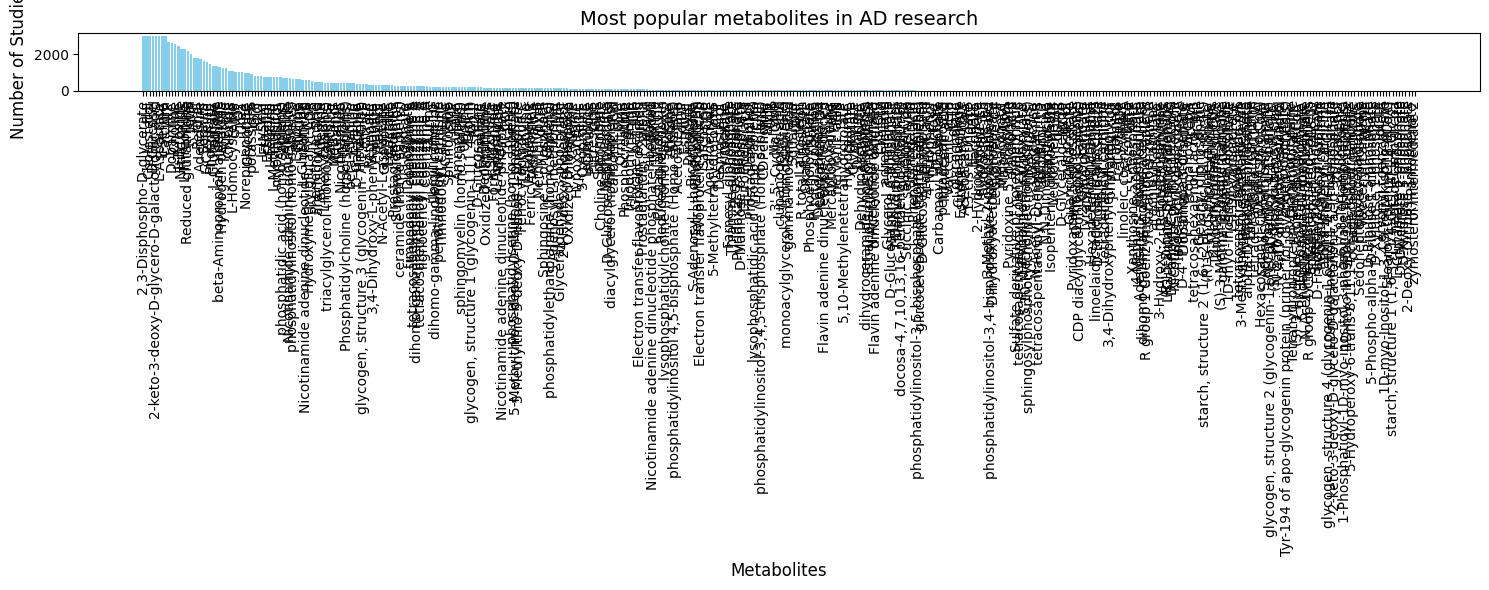

In [7]:
import matplotlib.pyplot as plt

# Example dictionary (Replace this with your actual data)

my_dict = results

# Sort keys by the number of elements in their values
sorted_keys = sorted(my_dict.keys(), key=lambda k: len(my_dict[k]), reverse=True)

# Get the top 100 keys and their respective list lengths
top_keys = sorted_keys[:400]
top_values_count = [len(my_dict[k]) for k in top_keys]

# Plot the data
plt.figure(figsize=(15, 6))
plt.bar(top_keys, top_values_count, color='skyblue')

# Add labels and title
plt.xlabel("Metabolites", fontsize=12)
plt.ylabel("Number of Studies", fontsize=12)
plt.title("Most popular metabolites in AD research", fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()


In [8]:
keys_with_3000_elements = [key for key, value in results.items() if len(value) == 3000]

# Count of keys with 3000 elements
count = len(keys_with_3000_elements)

# Output the results
print("Number of keys with lists having exactly 3000 elements:", count)
print("Keys with lists having exactly 3000 elements:")
for key in keys_with_3000_elements:
    print(key)


Number of keys with lists having exactly 3000 elements: 8
Keys with lists having exactly 3000 elements:
2,3-Disphospho-D-glycerate
H+
Cholesterol
D-Glucose
2-keto-3-deoxy-D-glycero-D-galactononic acid
L-Aspartate
L-Serine
Calcium


### Inspect matlab flux matrix in python

**19 reactions, 8 oxygen levels**

In [6]:
import scipy.io

# Load the .mat file
mat_file = '/home/andrei/Desktop/ASD/Internship/Existing_Work/RAVEN/software/GLPKmex/matrix_fluxes_reactionsByModels.mat'  # Path to your .mat file
mat_data = scipy.io.loadmat(mat_file)

# Inspect the keys in the loaded .mat file (the variable names saved in the file)
print("Keys in the .mat file:", mat_data.keys())

# Extract the matrix variable from the loaded dictionary (assuming it's called 'dummyMatrix')
dummy_matrix = mat_data['matrix_fluxes_reactionsByModels']

flux_matrix = dummy_matrix
# Inspect the matrix data
print("Matrix loaded from .mat file:")


# Check the shape and type of the matrix
print(f"Shape of the matrix: {dummy_matrix.shape}")
print(f"Type of the matrix: {type(dummy_matrix)}")
print(dummy_matrix)


Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'matrix_fluxes_reactionsByModels'])
Matrix loaded from .mat file:
Shape of the matrix: (19, 8)
Type of the matrix: <class 'numpy.ndarray'>
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0

reaction:  CHOLtr reaction idx:  0


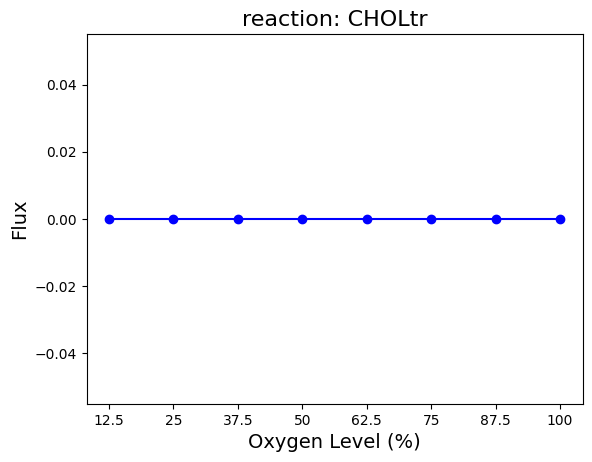

reaction:  PSSA1_hs reaction idx:  1


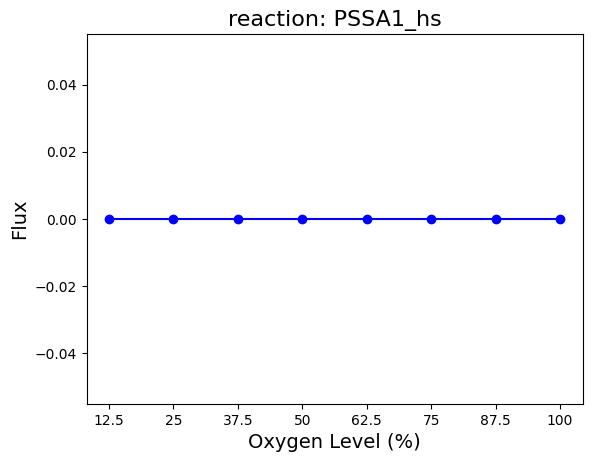

reaction:  AACOAT reaction idx:  2


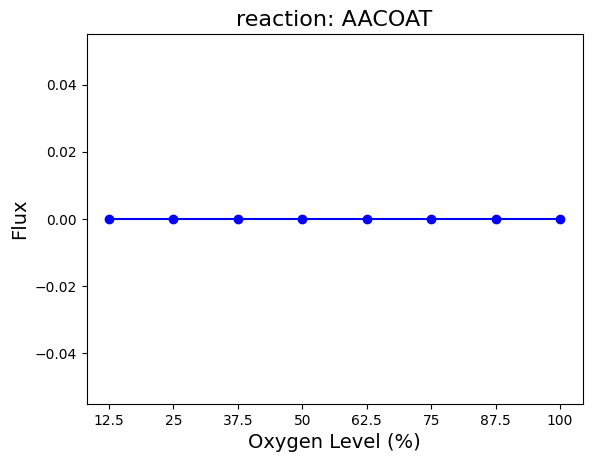

reaction:  ATPS4m reaction idx:  3


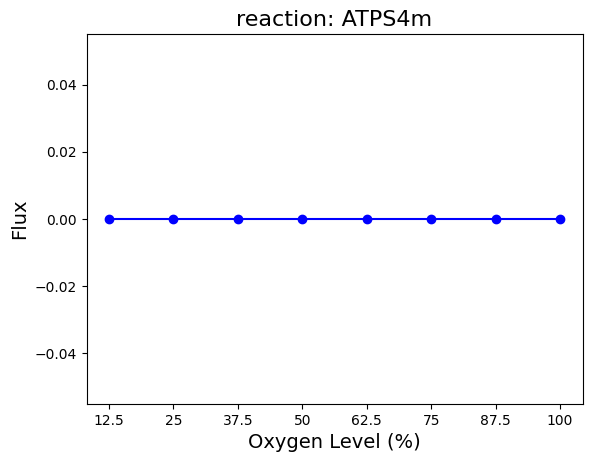

reaction:  CAATPS reaction idx:  4


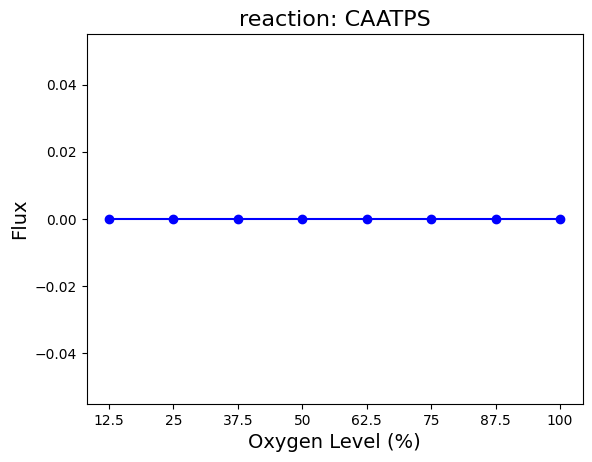

reaction:  CAt7r reaction idx:  5


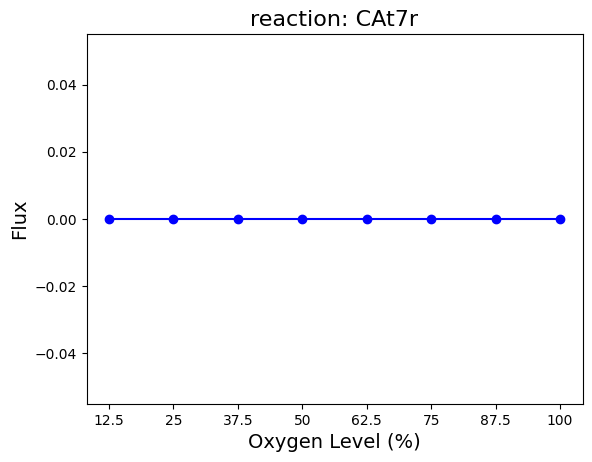

reaction:  FATP2t reaction idx:  6


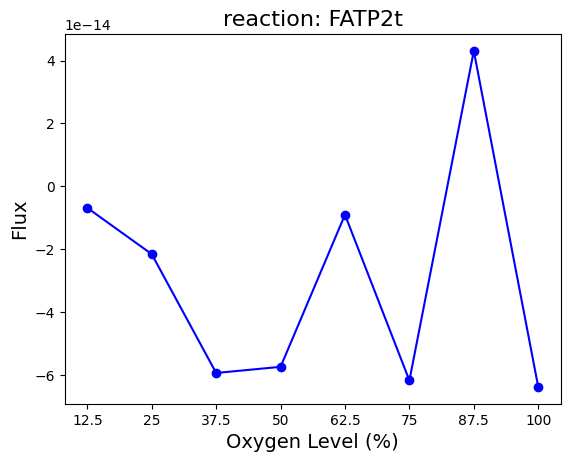

reaction:  FATP3t reaction idx:  7


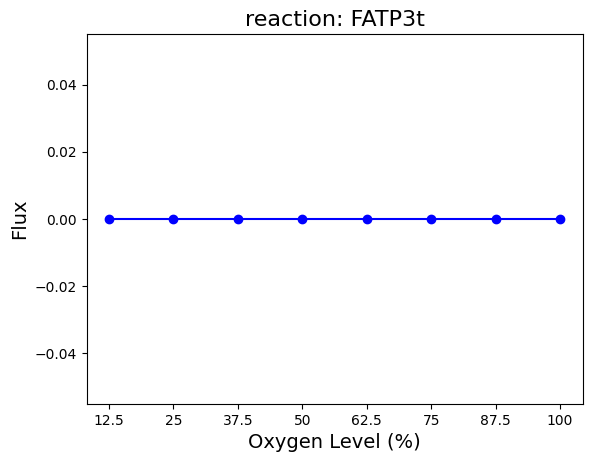

reaction:  FATP6t reaction idx:  8


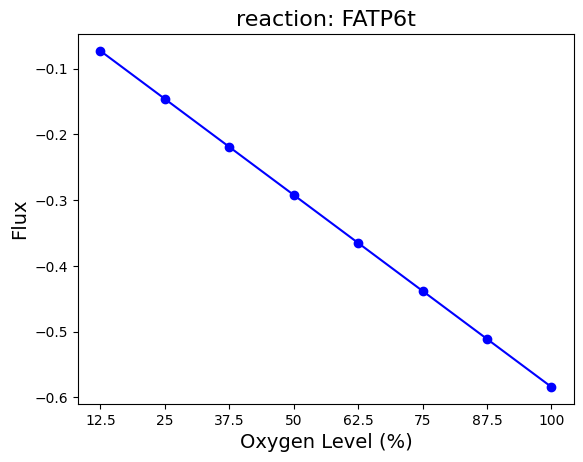

reaction:  FATP7t reaction idx:  9


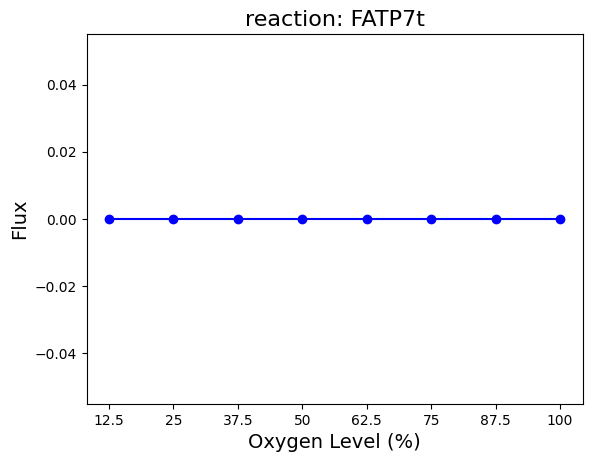

reaction:  FATP8t reaction idx:  10


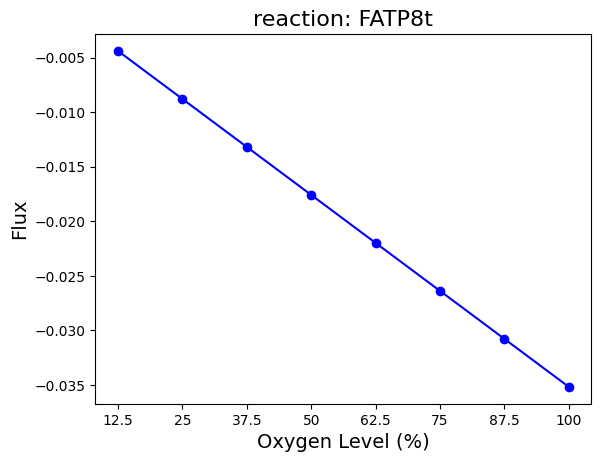

reaction:  FATP9t reaction idx:  11


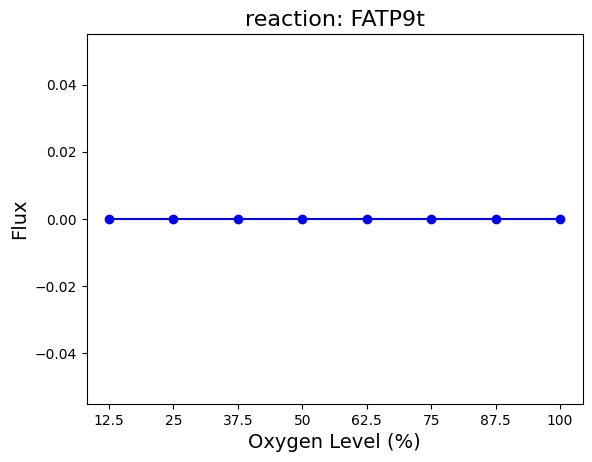

reaction:  NAt3_1 reaction idx:  12


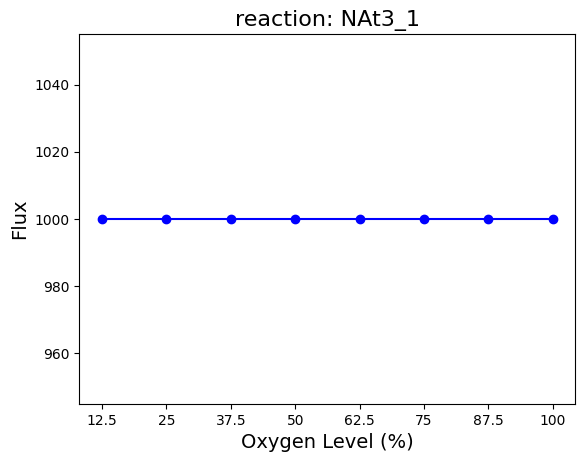

reaction:  NCKt reaction idx:  13


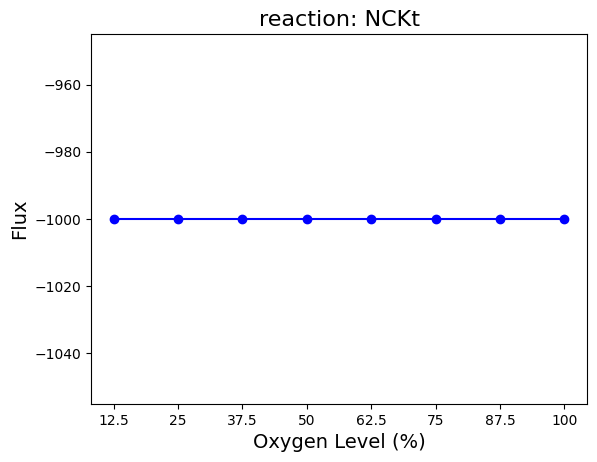

reaction:  NCNt reaction idx:  14


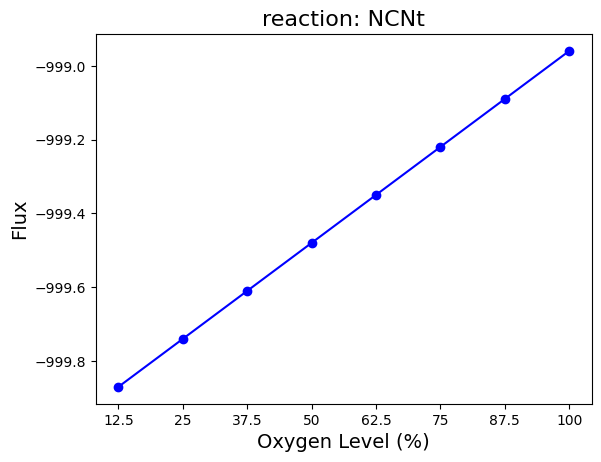

reaction:  NaKt reaction idx:  15


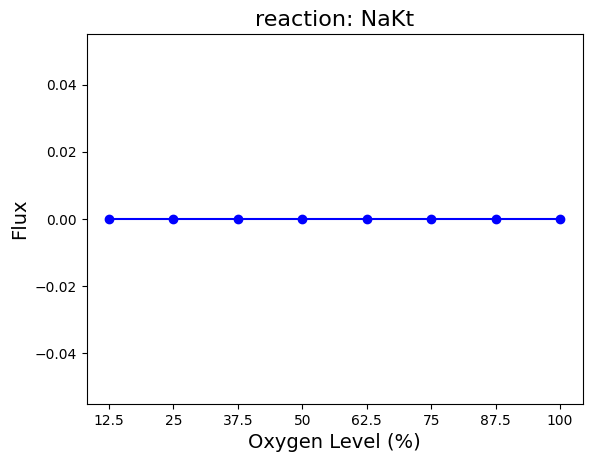

reaction:  SPODMe reaction idx:  16


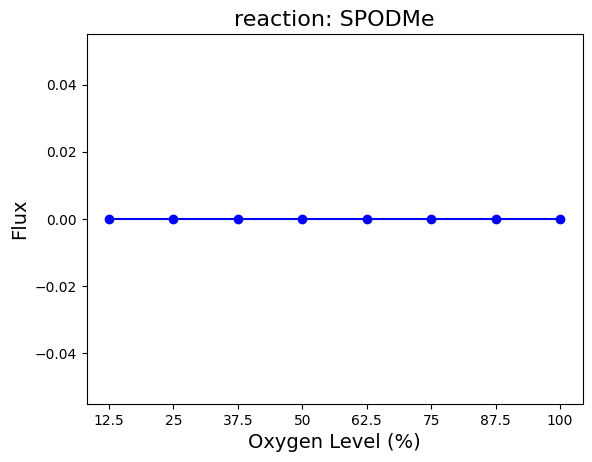

reaction:  AMY1e reaction idx:  17


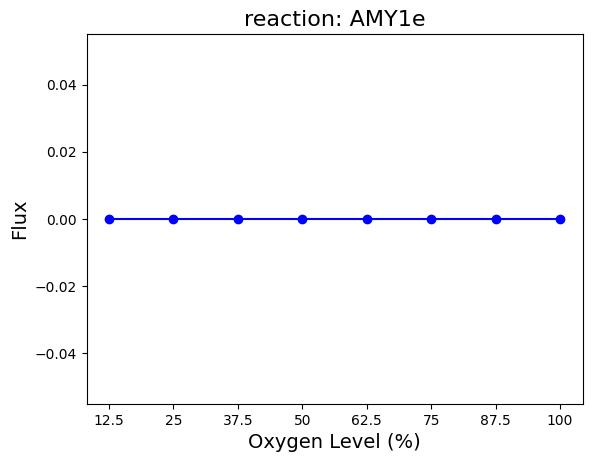

reaction:  AMY2e reaction idx:  18


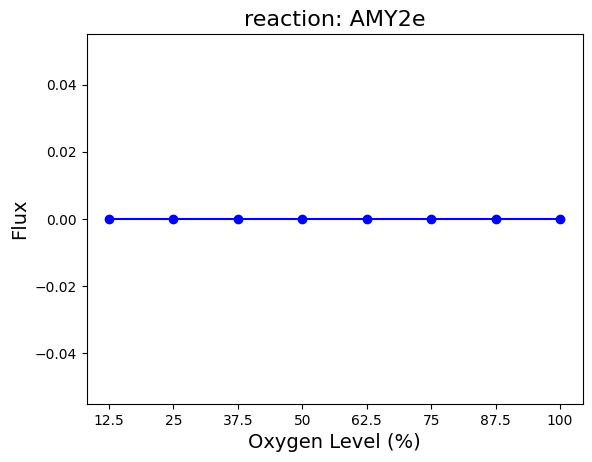

In [22]:
from matplotlib import pyplot as plt

for reaction_id in range(19):
    print("reaction: ", list_reactions_of_interest[reaction_id], "reaction idx: ", reaction_id)
    
    x_ticks = [12.5, 25, 37.5, 50, 62.5, 75, 87.5, 100]

    # Plotting
    # plt.plot(range(8), flux_matrix[reaction_id])
    plt.plot( flux_matrix[reaction_id], marker='o', linestyle='-', color='b', label='Row Sum')

    # Customize the plot
    plt.xlabel('Oxygen Level (%)', fontsize=14)  # Increased font size for x-label
    plt.ylabel('Flux', fontsize=14)             # Increased font size for y-label
    plt.title(f"reaction: {list_reactions_of_interest[reaction_id]}", fontsize=16)  # Increased font size for title

    # Set x-tick labels
    plt.xticks(ticks=np.linspace(0, len(flux_matrix[reaction_id])-1, len(x_ticks)), labels=x_ticks)


    plt.show()


### Plot aggregate of sodium

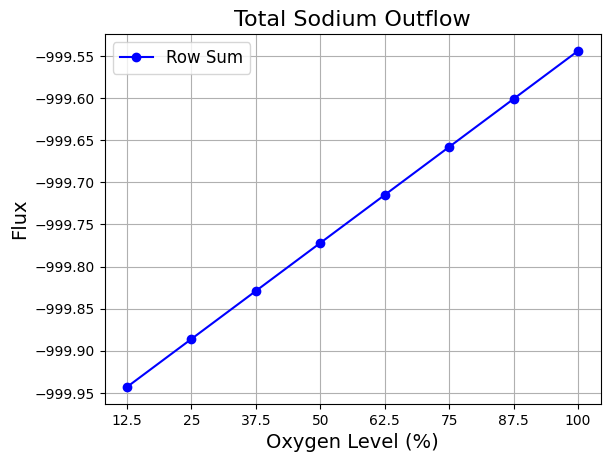

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming flux_matrix is already defined
# Extract the last 13 rows
last_10_rows = flux_matrix[-13:]

# Indices for active sodium rows
indxs_active_sodium = [6, 8, 9, 14]

# Sum along the rows (axis=0 sums across each column for the selected rows)
row_sums = flux_matrix[indxs_active_sodium, :].sum(axis=0)

# Define x-tick labels
x_ticks = [12.5, 25, 37.5, 50, 62.5, 75, 87.5, 100]

# Plotting
plt.plot(row_sums, marker='o', linestyle='-', color='b', label='Row Sum')

# Customize the plot
plt.xlabel('Oxygen Level (%)', fontsize=14)  # Increased font size for x-label
plt.ylabel('Flux', fontsize=14)             # Increased font size for y-label
plt.title('Total Sodium Outflow', fontsize=16)  # Increased font size for title

# Set x-tick labels
plt.xticks(ticks=np.linspace(0, len(row_sums)-1, len(x_ticks)), labels=x_ticks)

# Add grid and legend
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


### Look up 5 most popular metabolites, make list with their difference from baseline

where in the cell, what difference 

In [14]:
print(results["Choline"])

['39595522', '39595009', '39590293', '39587940', '39584303', '39570454', '39528509', '39521435', '39512703', '39507054', '39505222', '39481020', '39357562', '39337280', '39300341', '39265450', '39211110', '39201791', '39111704', '39111221', '39099798', '39070112', '39064875', '39064171', '39053739', '39048816', '39029606', '38998659', '38979214', '38978722', '38929542', '38905051', '38904658', '38875437', '38818467', '38782209', '38780885', '38779354', '38727282', '38726104', '38698500', '38653428', '38607082', '38599243', '38595916', '38582410', '38522309', '38511275', '33085373', '38498253', '38427291', '38427192', '38391922', '38371830', '38315685', '38308284', '38306038', '38290060', '38223452', '38204252', '38174904', '38116865', '38100354', '38056387', '37970257', '37965761', '37958552', '37929898', '37925002', '37890559', '37882235', '37777156', '37714307', '37700814', '37681686', '37662613', '37652198', '37648724', '37587894', '37587513', '37565253', '37551603', '37548694', '37